## Setup inicial

In [1]:
#!pip install -r dependencies

# Importando bibliotecas necessárias
import sidrapy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from etl import * # Importa as classes criadas para um código mais limpo
import yfinance as yf

palette = sns.color_palette('pastel')
sns.set_theme('notebook')

municípios_mt = pd.read_csv('tabelas/municipios_mt.csv')
dados = data_get(2018, 2022)

A cidade Diamantino-MT não consta nos registros de custos da Conab
A cidade Sapezal-MT não consta nos registros de custos da Conab
A cidade Nova Mutum-MT não consta nos registros de custos da Conab
A cidade Nova Ubiratã-MT não consta nos registros de custos da Conab
A cidade Querência-MT não consta nos registros de custos da Conab
A cidade Canarana-MT não consta nos registros de custos da Conab
A cidade Campo Verde-MT não consta nos registros de custos da Conab


## Dados referentes à produção de soja

In [2]:
soja_uf = sidrapy.get_table(
    table_code = '5457',
    territorial_level = '3',
    ibge_territorial_code = 'all',
    period = '2018-2022',
    classification = '782/40124',
    variable = '214,8331'
)[['D2N','D1N','D3N','V']]

soja_uf.columns = soja_uf.iloc[0]
soja_uf.drop(index = 0, inplace=True)

soja_uf['Valor'] = soja_uf['Valor'].replace('-', 0) # Mudando valores '-' para 0
soja_uf['Valor'] = [float(val) for val in soja_uf['Valor']]

soja_uf

,Ano,Unidade da Federação,Variável,Valor
1,2018,Rondônia,Quantidade produzida,1000311.0
2,2018,Rondônia,Área plantada ou destinada à colheita,300816.0
3,2019,Rondônia,Quantidade produzida,1190195.0
4,2019,Rondônia,Área plantada ou destinada à colheita,344551.0
5,2020,Rondônia,Quantidade produzida,1348724.0
...,...,...,...,...
212,2019,Distrito Federal,Área plantada ou destinada à colheita,75000.0
213,2020,Distrito Federal,Quantidade produzida,290550.0
214,2020,Distrito Federal,Área plantada ou destinada à colheita,74500.0
215,2021,Distrito Federal,Quantidade produzida,312000.0


/tmp/ipykernel_2295/3490686265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soja_uf_2021['uf/br'] = soja_uf_2021['Valor'] / sum(soja_uf_2021['Valor'])


Text(0, 0.5, 'Estado')

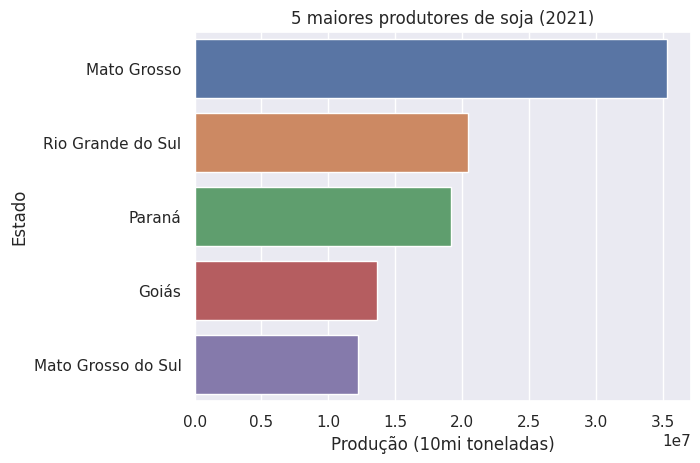

In [3]:
soja_uf_2021 = soja_uf[soja_uf['Ano'] == '2021']
soja_uf_2021['uf/br'] = soja_uf_2021['Valor'] / sum(soja_uf_2021['Valor'])

top5_uf = soja_uf_2021[soja_uf_2021['Variável'] == 'Quantidade produzida'].sort_values(by = 'Valor', ascending=False).head(5)

plt.title("5 maiores produtores de soja (2021)")
sns.barplot(top5_uf, y = 'Unidade da Federação', x = 'Valor')
plt.xlabel('Produção (10mi toneladas)')
plt.ylabel('Estado')

In [4]:
True in [vl is float for vl in soja_uf['Valor']]

False

In [5]:
#dados.soy()
soja = pd.read_csv('tabelas/prod_soja_mt_2018_2021.csv', index_col = ['Ano'])
soja

,Município,Quantidade produzida (Toneladas),Valor da produção (Mil Reais),Área plantada ou destinada à colheita (Hectares),Área plantada ou destinada à colheita - percentual do total geral (Percentual)
Ano,,,,,
2018,Acorizal (MT),0.0,0.0,0.0,0.00
2018,Alta Floresta (MT),66006.0,79207.0,20002.0,57.51
2018,Alto Araguaia (MT),99830.0,99830.0,31393.0,62.65
2018,Alto Boa Vista (MT),73853.0,66468.0,23671.0,74.92
2018,Alto Garças (MT),306900.0,306900.0,93000.0,67.43
...,...,...,...,...,...
2021,Vera (MT),508200.0,1260245.0,155000.0,53.35
2021,Vila Bela da Santíssima Trindade (MT),134025.0,344042.0,38513.0,64.44
2021,Vila Rica (MT),180000.0,464940.0,45000.0,64.02


### Produção Mato Grosso

/tmp/ipykernel_2295/1620251165.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  produção_mt = soja.groupby(by = soja.index, axis = 0).sum()
/tmp/ipykernel_2295/1620251165.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)
/tmp/ipykernel_2295/1620251165.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = produção_mt, x = produção_mt.index, y = 'Quantidade produzida (Toneladas)', palette = palette)


<AxesSubplot: title={'center': 'Valor da produção (Mil reais)'}, xlabel='Ano', ylabel='Valor da produção (Mil Reais)'>

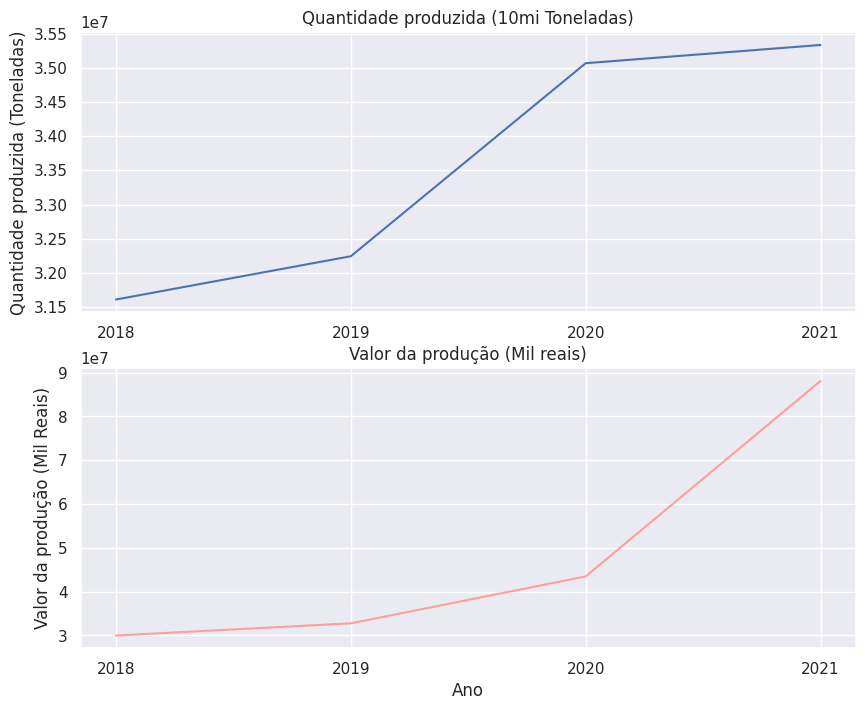

In [6]:
produção_mt = soja.groupby(by = soja.index, axis = 0).sum()

plt.figure(figsize=(10,8))
plt.title('Soja no MT - 2018 à 2021')

plt.subplot(2,1,1)
plt.title("Quantidade produzida (10mi Toneladas)")
plt.xticks(produção_mt.index)
plt.xlabel(' ')
sns.lineplot(data = produção_mt, x = produção_mt.index, y = 'Quantidade produzida (Toneladas)', palette = palette)

plt.subplot(2,1,2)
plt.title("Valor da produção (Mil reais)")
plt.xticks(produção_mt.index)
sns.lineplot(data = produção_mt, x = produção_mt.index, y = 'Valor da produção (Mil Reais)', color = palette[3])

Sabemos que o 2021 foi um ano atípico para o mercado da soja, então precisamos fazer alguns ajustes.

O preço da tonelada 

/tmp/ipykernel_2295/3794952825.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(soja_futuro_hist, palette = palette)


NameError: name 'dt' is not defined

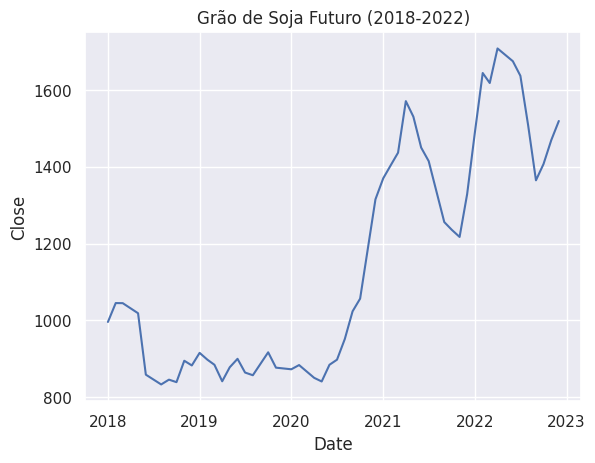

In [7]:
from datetime import datetime
preco_ton = pd.DataFrame(produção_mt['Valor da produção (Mil Reais)'] *1000 / produção_mt['Quantidade produzida (Toneladas)'], columns = ['preco'])

soja_futuro = yf.Ticker('ZS=F')
soja_futuro_hist = soja_futuro.history(start = '2018-01-01', end = '2022-12-31', interval='1mo')['Close']

plt.title('Grão de Soja Futuro (2018-2022)')
sns.lineplot(soja_futuro_hist, palette = palette)
#plt.xticks(['2018','2019','2020','2021', '2022', '2023'], labels=[2018, 2019, 2020, 2021, 2022, 2023])
plt.axvline(dt(2019,11,1), label = 'Primeiro caso de Covid-19 (provável)')
plt.axvline(dt(2020,3,11), label = 'OMS declara a Covid-19 pandêmica', color = 'red')
plt.axvline(dt(2021,11,24), label = 'Primeiro caso da variante Ómicron', color = 'green')
plt.axvline(dt(2022,2,25), label = 'Batalha de Kiev', color = 'yellow')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Ano")
plt.ylabel("Preço")

In [ ]:
soja_futuro_hist

Date
2018-01-01 00:00:00-05:00     995.75
2018-02-01 00:00:00-05:00    1045.00
2018-03-01 00:00:00-05:00    1044.75
2018-05-01 00:00:00-04:00    1018.50
2018-06-01 00:00:00-04:00     858.50
2018-08-01 00:00:00-04:00     833.00
2018-09-01 00:00:00-04:00     845.50
2018-10-01 00:00:00-04:00     839.00
2018-11-01 00:00:00-04:00     894.75
2018-12-01 00:00:00-05:00     882.50
2019-01-01 00:00:00-05:00     915.25
2019-02-01 00:00:00-05:00     897.50
2019-03-01 00:00:00-05:00     884.25
2019-04-01 00:00:00-04:00     841.25
2019-05-01 00:00:00-04:00     877.75
2019-06-01 00:00:00-04:00     899.75
2019-07-01 00:00:00-04:00     864.00
2019-08-01 00:00:00-04:00     857.00
2019-10-01 00:00:00-04:00     916.75
2019-11-01 00:00:00-04:00     876.75
2020-01-01 00:00:00-05:00     872.50
2020-02-01 00:00:00-05:00     883.50
2020-04-01 00:00:00-04:00     850.25
2020-05-01 00:00:00-04:00     840.75
2020-06-01 00:00:00-04:00     884.25
2020-07-01 00:00:00-04:00     897.50
2020-08-01 00:00:00-04:00     951

In [ ]:
soja

,Município,Quantidade produzida (Toneladas),Valor da produção (Mil Reais),Área plantada ou destinada à colheita (Hectares),Área plantada ou destinada à colheita - percentual do total geral (Percentual)
Ano,,,,,
2018,Acorizal (MT),0.0,0.0,0.0,0.00
2018,Alta Floresta (MT),66006.0,79207.0,20002.0,57.51
2018,Alto Araguaia (MT),99830.0,99830.0,31393.0,62.65
2018,Alto Boa Vista (MT),73853.0,66468.0,23671.0,74.92
2018,Alto Garças (MT),306900.0,306900.0,93000.0,67.43
...,...,...,...,...,...
2021,Vera (MT),508200.0,1260245.0,155000.0,53.35
2021,Vila Bela da Santíssima Trindade (MT),134025.0,344042.0,38513.0,64.44
2021,Vila Rica (MT),180000.0,464940.0,45000.0,64.02


In [10]:
top10_producao = soja.loc[2021].sort_values('Quantidade produzida (Toneladas)', ascending = False).head(10)
top10_producao_year = pd.DataFrame()

for mun in top10_producao['Município']: 
    yearly = [mun] + [soja[soja['Município'] == mun]['Quantidade produzida (Toneladas)'].loc[year] for year in range(2018,2022)]
    top10_producao_year = pd.concat([top10_producao_year, pd.Series(yearly)], axis = 1)
top10_producao_year.columns = top10_producao_year.iloc[0]
top10_producao_year.drop(index = 0, inplace= True)

Text(0.5, 0, 'Ano')

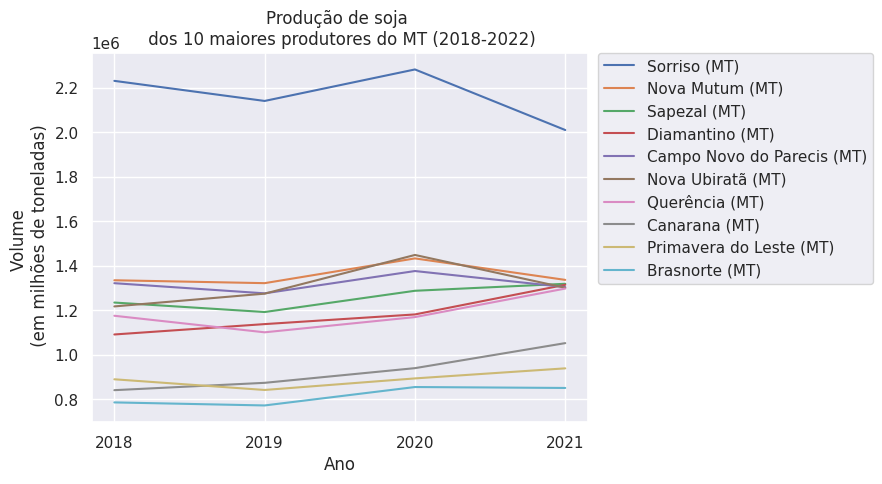

In [11]:
top10_producao_year.reset_index(drop=True)
top10_producao_year.index = range(2018,2022)

plt.title("Produção de soja \n dos 10 maiores produtores do MT (2018-2022)")
for mun in top10_producao_year.columns:
    sns.lineplot(top10_producao_year[mun], label = mun)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks([2018,2019,2020,2021])
plt.ylabel('Volume \n (em milhões de toneladas)')
plt.xlabel('Ano')

In [12]:
top10_producao_year

,Sorriso (MT),Nova Mutum (MT),Sapezal (MT),Diamantino (MT),Campo Novo do Parecis (MT),Nova Ubiratã (MT),Querência (MT),Canarana (MT),Primavera do Leste (MT),Brasnorte (MT)
2018,2232000.0,1335600.0,1235400.0,1091880.0,1322400.0,1218000.0,1176000.0,841500.0,890400.0,786480.0
2019,2141700.0,1322580.0,1192800.0,1138500.0,1276800.0,1275357.0,1101600.0,874500.0,842400.0,772800.0
2020,2283300.0,1433850.0,1288320.0,1181952.0,1377060.0,1449360.0,1170000.0,940500.0,894360.0,855600.0
2021,2010960.0,1337280.0,1319731.0,1315239.0,1304958.0,1301915.0,1298304.0,1053000.0,939600.0,851453.0


In [13]:
yearly = ['Sorriso (MT)'].append(
    [soja[soja['Município'] == 'Sorriso (MT)']['Quantidade produzida (Toneladas)'].loc[year] for year in range(2018,2022)]
    )
type(yearly)

NoneType

Qual a métrica correta para dizer que um município é um grande produtor de soja? Bom, depende.

Na nossa situação vai depender do objetivo da nossa empresa fictícia. Objetivos diferentes precisam de estratégias diferentes que utilizam diferentes métricas.

O objetivo é *marketshare*? Então faz sentido sentido ordenar os municípios pela sua produção total. Se for geração de caixa então faz sentido utilizar o valor da produção.

In [14]:
['Sorriso (MT)'] + [soja[soja['Município'] == 'Sorriso (MT)']['Quantidade produzida (Toneladas)'].loc[year] for year in range(2018,2022)]

['Sorriso (MT)', 2232000.0, 2141700.0, 2283300.0, 2010960.0]

## Dados referentes aos custos de produção

No relatório da Conab não constam todas as cidades do Mato Grosso, apenas Sorriso, Primavera do Leste e Campo Novo do Parecis 

In [15]:
sorriso_mt = pd.read_excel('tabelas/custos/custos_prod_soja_Sorriso-MT_2018_2022.xlsx', index_col=[0,1]).fillna(0)
primavera_do_leste_mt = pd.read_excel('tabelas/custos/custos_prod_soja_P. do Leste-MT_2018_2022.xlsx', index_col=[0,1]).fillna(0)
campo_novo_do_parecis_mt = pd.read_excel('tabelas/custos/custos_prod_soja_C. Novo do Parecis-MT_2018_2022.xlsx', index_col=[0,1]).fillna(0)

In [16]:
from numpy import std

sorriso_mt_fert = sorriso_mt.loc[9.0]
primavera_do_leste_mt_fert = primavera_do_leste_mt.loc[9.0]
campo_novo_do_parecis_mt_fert = campo_novo_do_parecis_mt.loc[9.0]

fertilizantes_df = pd.concat([sorriso_mt_fert, primavera_do_leste_mt_fert, campo_novo_do_parecis_mt_fert])
fertilizantes_df.columns = range(2018,2023)
fertilizantes_df.index = ['Sorriso', 'Primavera do Leste', 'Campo Novo do Parecis']

fertilizantes_df.loc['Média Anual'] = [round(fertilizantes_df[year].mean()) for year in fertilizantes_df.columns]
fertilizantes_df.loc['Desvio Padrão'] = [round(std(fertilizantes_df[year])) for year in fertilizantes_df.columns]
fertilizantes_df.loc['Desvio Padrão Rel. (%)'] = round(fertilizantes_df.loc['Desvio Padrão'] * 100 / fertilizantes_df.loc['Média Anual'])
fertilizantes_df['Média Mun.'] = fertilizantes_df[fertilizantes_df.columns[0:5]].mean(axis=1)
fertilizantes_df['Média Var. (%)'] = round(((((fertilizantes_df[2022] - fertilizantes_df[2018])/fertilizantes_df[2018]) -1) /5)*100, 2)
print(fertilizantes_df.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &    2018 &    2019 &    2020 &     2021 &     2022 &  Média Mun. &  Média Var. (\%) \\
\midrule
Sorriso                &  702.20 &  892.50 &  913.50 &  1320.76 &  2565.44 &    1278.880 &           33.07 \\
Primavera do Leste     &  795.80 &  957.06 &  987.05 &  1046.69 &  2658.01 &    1288.922 &           26.80 \\
Campo Novo do Parecis  &  691.63 &  903.60 &  766.22 &   910.30 &  2244.92 &    1103.334 &           24.92 \\
Média Anual            &  730.00 &  918.00 &  889.00 &  1093.00 &  2489.00 &    1223.800 &           28.19 \\
Desvio Padrão          &   41.00 &   24.00 &   80.00 &   148.00 &   153.00 &      89.200 &           34.63 \\
Desvio Padrão Rel. (\%) &    6.00 &    3.00 &    9.00 &    14.00 &     6.00 &       7.600 &          -20.00 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2295/1331383609.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(fertilizantes_df.to_latex())


<AxesSubplot: >

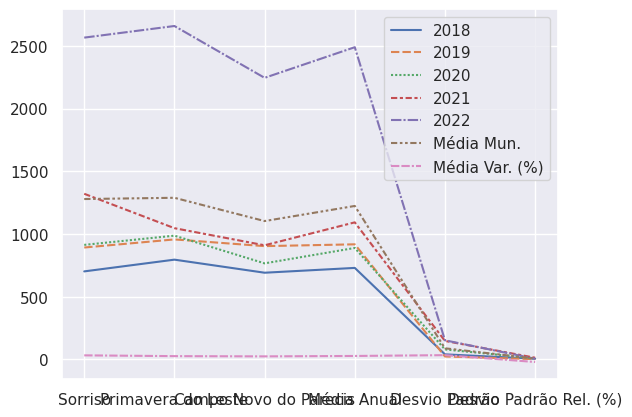

In [17]:
erro_minus =  fertilizantes_df.loc['Média Anual'][fertilizantes_df.columns[0:5]] * (1 - 0.076)
error_plus = fertilizantes_df.loc['Média Anual'][fertilizantes_df.columns[0:5]] * (1 + 0.076)